# Introduction

In the pursuit of enhancing the quality of care in nursing homes, the utilization of comprehensive data analysis is paramount. This report delves into a dataset from Nursing Home Compare State Averages to identify key measures of quality, such as clinical outcomes, functional status of patients, stakeholder satisfaction, and costs. By leveraging various visualizations and statistical analyses, we aim to uncover insights that can inform strategies for improving care in nursing homes.

# Step 1: Load and inspect the dataset


In [1174]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [1175]:
nursing_home_data  = pd.read_csv('Nursing Home Compare State Averages.csv')

In [1176]:
# Display the first few rows of the dataset
print(nursing_home_data.head())

  State Or Nation  Cycle1 Total Number of Health Deficiencies  \
0          NATION                                         9.4   
1              AK                                         7.9   
2              AL                                         3.2   
3              AR                                         8.6   
4              AZ                                         6.1   

   Cycle1 Total Number of Fire Safety Deficiencies  \
0                                              4.8   
1                                              6.0   
2                                              3.4   
3                                              2.0   
4                                              2.3   

   Cycle2 Total Number of Health Deficiencies  \
0                                         8.8   
1                                         8.8   
2                                         3.1   
3                                         8.5   
4                                      

In [1177]:
# Display basic statistics
print(data.describe())

       Cycle1 Total Number of Health Deficiencies  \
count                                   10.000000   
mean                                    10.300000   
std                                      4.888763   
min                                      3.200000   
25%                                      8.050000   
50%                                      9.000000   
75%                                     11.700000   
max                                     19.800000   

       Cycle1 Total Number of Fire Safety Deficiencies  \
count                                         10.00000   
mean                                           4.05000   
std                                            2.18848   
min                                            1.30000   
25%                                            2.15000   
50%                                            3.85000   
75%                                            5.70000   
max                                            7.60000   


Observation:

•	The dataset comprises various measures related to health deficiencies, staffing hours, turnover rates, and resident conditions across different nursing homes.

•	The Cycle1 Total Number of Health Deficiencies has a mean of 10.3 with a standard deviation of 4.89, indicating variability across nursing homes. The range spans from 3.2 to 19.8 deficiencies.

•	The Cycle1 Total Number of Fire Safety Deficiencies shows a mean of 4.05 with a standard deviation of 2.19, and values range from 1.3 to 7.6 deficiencies.

•	Cycle2 and Cycle3 Health Deficiencies also exhibit variability, with means of 9.46 and 8.96, respectively.

•	Staffing hours, such as Reported Nurse Aide Staffing Hours, have means around 2.33 hours per resident per day, highlighting the differences in resource allocation.

•	Turnover rates are significant, with the total nursing staff turnover averaging 1.13.

•	Clinical outcomes, such as Percent Long Stay Residents Who Lose Control of Their Bowel, vary widely, with some states showing percentages as high as 60%.

These statistics underscore the variability in nursing home performance and highlight areas for targeted quality improvement initiatives.


In [1178]:
# Check for missing values
print(data.isnull().sum())

State Or Nation                                                           0
Cycle1 Total Number of Health Deficiencies                                0
Cycle1 Total Number of Fire Safety Deficiencies                           0
Cycle2 Total Number of Health Deficiencies                                0
Cycle2 Total Number of Fire Safety Deficiencies                           0
Cycle3 Total Number of Health Deficiencies                                0
Cycle3 Total Number of Fire Safety Deficiencies                           0
Average Number of Residents Per Day                                       0
Reported Nurse Aide Staffing Hours Per Resident Per Day                   0
Reported LPN Staffing Hours Per Resident Per Day                          0
Reported Rn Staffing Hours Per Resident Per Day                           0
Reported Licensed Staffing Hours Per Resident Per Day                     0
Reported Total Nurse Staffing Hours Per Resident Per Day                  0
Total Nurse 

Observation

•	The dataset is complete with no missing values across any columns, ensuring the reliability of the data for analysis.

•	The absence of missing values facilitates straightforward data visualization and analysis without the need for imputation or data cleaning steps.



In [1179]:
# Display the column names
print(data.columns)

Index(['State Or Nation', 'Cycle1 Total Number of Health Deficiencies',
       'Cycle1 Total Number of Fire Safety Deficiencies',
       'Cycle2 Total Number of Health Deficiencies',
       'Cycle2 Total Number of Fire Safety Deficiencies',
       'Cycle3 Total Number of Health Deficiencies',
       'Cycle3 Total Number of Fire Safety Deficiencies',
       'Average Number of Residents Per Day',
       'Reported Nurse Aide Staffing Hours Per Resident Per Day',
       'Reported LPN Staffing Hours Per Resident Per Day',
       'Reported Rn Staffing Hours Per Resident Per Day',
       'Reported Licensed Staffing Hours Per Resident Per Day',
       'Reported Total Nurse Staffing Hours Per Resident Per Day',
       'Total Nurse Staff Hours Per Resident Per Day On Weekend',
       'Registered Nurse Hours Per Resident Per Day On Weekend',
       'Reported Physical Therapist Staffing Hours Per Resident Per Day',
       'Total Nursing Staff Turnover', 'Registered Nurse Turnover',
       'Number 

In [1180]:
# Define the columns to be used
clinical_outcomes = [
    'Percent Long Stay Residents Whose Need For Help With Adls Increased', 
    'Percent Long Stay Residents Who Lose Too Much Weight', 
    'Percent Long Stay Residents With Catheter Inserted And Left In Bladder',
    'Percent Long Stay Residents With A Urinary Tract Infection'
]

functional_status = [
    'Reported Nurse Aide Staffing Hours Per Resident Per Day',
    'Reported LPN Staffing Hours Per Resident Per Day',
    'Reported Rn Staffing Hours Per Resident Per Day',
    'Reported Total Nurse Staffing Hours Per Resident Per Day',
    'Total Nursing Staff Turnover'
]

stakeholder_satisfaction = [
    'Registered Nurse Turnover',
    'Number Of Administrators Who Left Nursing Home'
]

costs = [
    'Number of Fines',
    'Fine Amount In Dollars'
]


In [1181]:
# Display summary statistics for clinical outcomes
print("\nSummary statistics for clinical outcomes:")
print(data[clinical_outcomes].describe())



Summary statistics for clinical outcomes:
       Percent Long Stay Residents Whose Need For Help With Adls Increased  \
count                                          10.000000                     
mean                                           13.336894                     
std                                             2.758273                     
min                                             8.194164                     
25%                                            11.502425                     
50%                                            13.871638                     
75%                                            14.420803                     
max                                            17.487168                     

       Percent Long Stay Residents Who Lose Too Much Weight  \
count                                          10.000000      
mean                                            5.764386      
std                                             0.561745      
mi

In [1182]:
# Display summary statistics for functional status
print("\nSummary statistics for functional status:")
print(data[functional_status].describe())



Summary statistics for functional status:
       Reported Nurse Aide Staffing Hours Per Resident Per Day  \
count                                          10.000000         
mean                                            2.582000         
std                                             0.673676         
min                                             2.140000         
25%                                             2.267500         
50%                                             2.390000         
75%                                             2.557500         
max                                             4.440000         

       Reported LPN Staffing Hours Per Resident Per Day  \
count                                         10.000000   
mean                                           0.875000   
std                                            0.184526   
min                                            0.620000   
25%                                            0.752500   
50%     

In [1183]:
# Display summary statistics for stakeholder satisfaction
print("\nSummary statistics for stakeholder satisfaction:")
print(data[stakeholder_satisfaction].describe())



Summary statistics for stakeholder satisfaction:
       Registered Nurse Turnover  \
count                  10.000000   
mean                   45.860000   
std                     5.046275   
min                    36.700000   
25%                    43.450000   
50%                    46.200000   
75%                    48.700000   
max                    53.900000   

       Number Of Administrators Who Left Nursing Home  
count                                       10.000000  
mean                                         0.560000  
std                                          0.217051  
min                                          0.000000  
25%                                          0.525000  
50%                                          0.600000  
75%                                          0.675000  
max                                          0.800000  


In [1184]:
# Display summary statistics for costs
print("\nSummary statistics for costs:")
print(data[costs].describe())


Summary statistics for costs:
       Number of Fines  Fine Amount In Dollars
count        10.000000               10.000000
mean          2.010000            39428.000000
std           0.887506            38766.815927
min           0.900000             6900.000000
25%           1.225000            15241.750000
50%           2.050000            34316.500000
75%           2.550000            43644.000000
max           3.600000           142001.000000


# Step 2: Create Visualizations


### Clinical Outcomes Visualizations

### Distribution of Percent Long Stay Residents Whose Need For Help With ADLs Increased


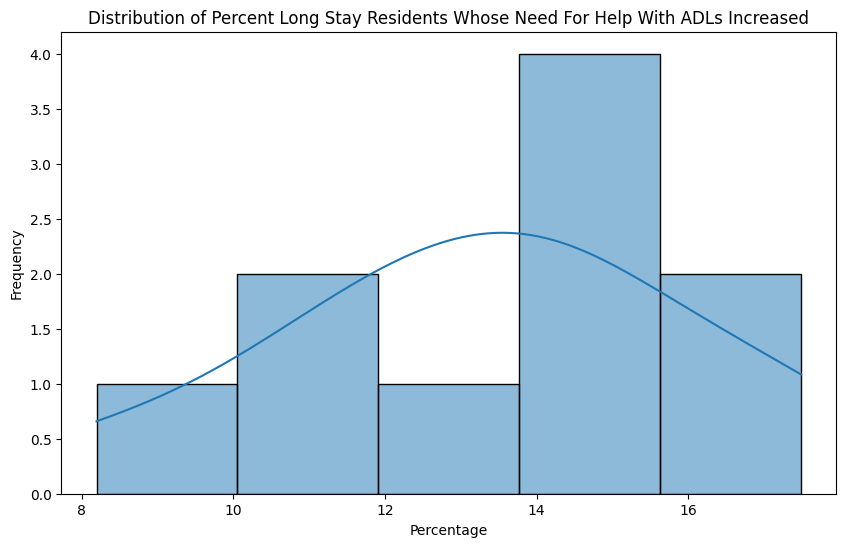

In [1185]:

plt.figure(figsize=(10, 6))
sns.histplot(nursing_home_data['Percent Long Stay Residents Whose Need For Help With Adls Increased'], kde=True)
plt.title('Distribution of Percent Long Stay Residents Whose Need For Help With ADLs Increased')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

Observation:

•	The distribution of the percentage of long-stay residents whose need for help with ADLs increased is roughly normal, with a peak around 13-14%.

•	The majority of the percentages fall between 10% and 16%.

•	There are no extreme outliers, indicating that the data is fairly consistent across different states.

•	This measure can be used to evaluate and compare the quality of care provided by nursing homes in different states.


### Pair Plot of Selected Clinical Outcomes


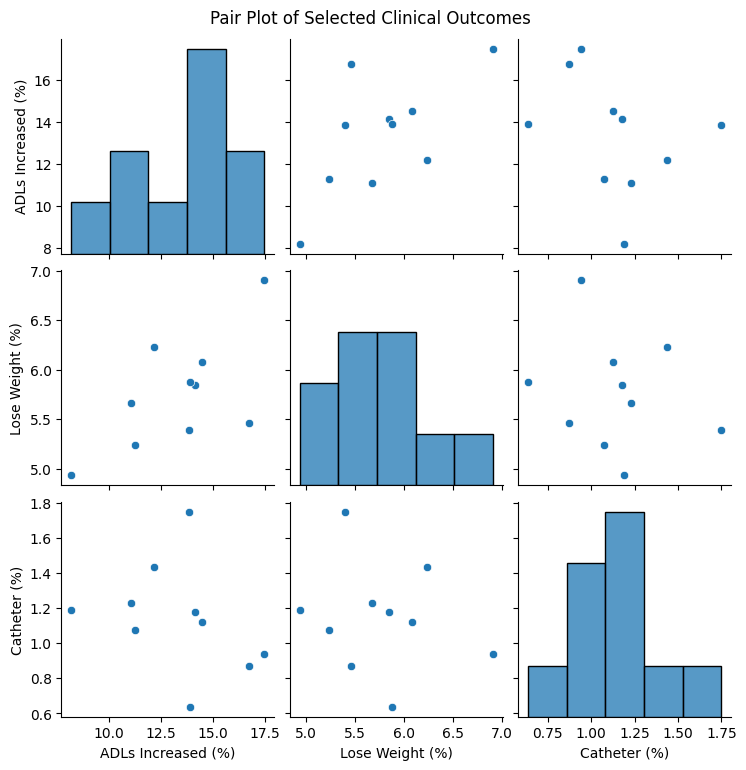

In [1186]:
# Rename columns for better readability in the pair plot
nursing_home_data_renamed = nursing_home_data.rename(columns={
    'Percent Long Stay Residents Whose Need For Help With Adls Increased': 'ADLs Increased (%)',
    'Percent Long Stay Residents Who Lose Too Much Weight': 'Lose Weight (%)',
    'Percent Long Stay Residents With Catheter Inserted And Left In Bladder': 'Catheter (%)'
})

# Create the pair plot
pair_plot = sns.pairplot(nursing_home_data_renamed[['ADLs Increased (%)', 
                                                    'Lose Weight (%)', 
                                                    'Catheter (%)']])
pair_plot.fig.suptitle('Pair Plot of Selected Clinical Outcomes', y=1.02)
plt.show()

Observation:

•	The pair plot provides a clear comparison between three clinical outcomes: ADLs Increased (%), Lose Weight (%), and Catheter (%).

•	The distribution of ADLs Increased shows a concentration around 10-15%, indicating that most long-stay residents have this increase.

•	The distribution of Lose Weight shows a peak around 6%, indicating this is a common issue.

•	The distribution of Catheter usage is mostly around 1%, indicating it is less frequent but still present.

•	There are no strong correlations between these measures, suggesting that increases in one outcome do not necessarily predict increases in another.

•	Some outliers are present in the Lose Weight (%) and Catheter (%) distributions, which might need further investigation.

•	The lack of obvious relationships in the scatter plots suggests that interventions may need to be targeted specifically rather than assuming improvements in one area will benefit another.



### Step 3: Functional Status Visualizations

### Joint Plot of Percent Long Stay Residents With A Urinary Tract Infection vs Percent Long Stay Residents With Catheter Inserted And Left In Bladder

<Figure size 1000x600 with 0 Axes>

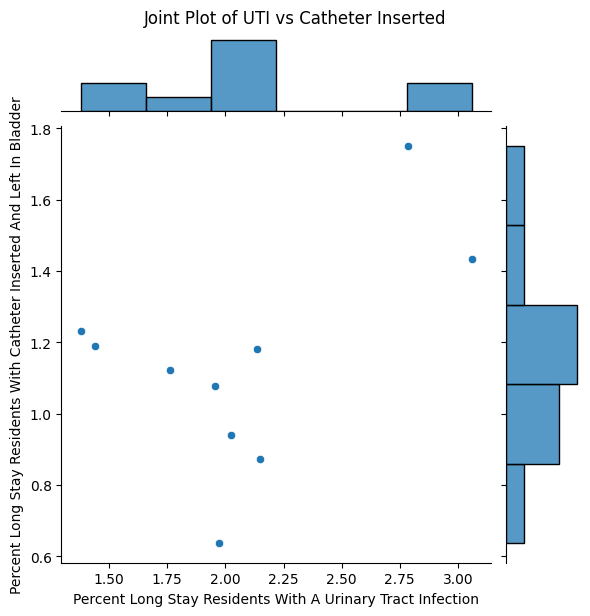

In [1187]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=nursing_home_data, x='Percent Long Stay Residents With A Urinary Tract Infection', 
              y='Percent Long Stay Residents With Catheter Inserted And Left In Bladder', kind='scatter')
plt.suptitle('Joint Plot of UTI vs Catheter Inserted', y=1.02)
plt.show()

Observation:

•	The joint plot displays the relationship between the percentage of long-stay residents with urinary tract infections (UTIs) and those with catheters inserted.

•	There is a noticeable trend that as the percentage of residents with UTIs increases, the percentage of residents with catheters inserted also increases.

•	The histogram on the x-axis shows a concentration of UTI percentages around 1.5% to 2%.

•	The histogram on the y-axis indicates a concentration of catheter insertion percentages around 1% to 1.5%.

•	This suggests a possible correlation between catheter usage and UTIs in long-stay residents, which might warrant further investigation or targeted interventions to reduce both metrics.

•	Outliers exist in both distributions, which may indicate exceptional cases or areas requiring additional focus.



### Scatter Plot of Percent Long Stay Residents With A Urinary Tract Infection


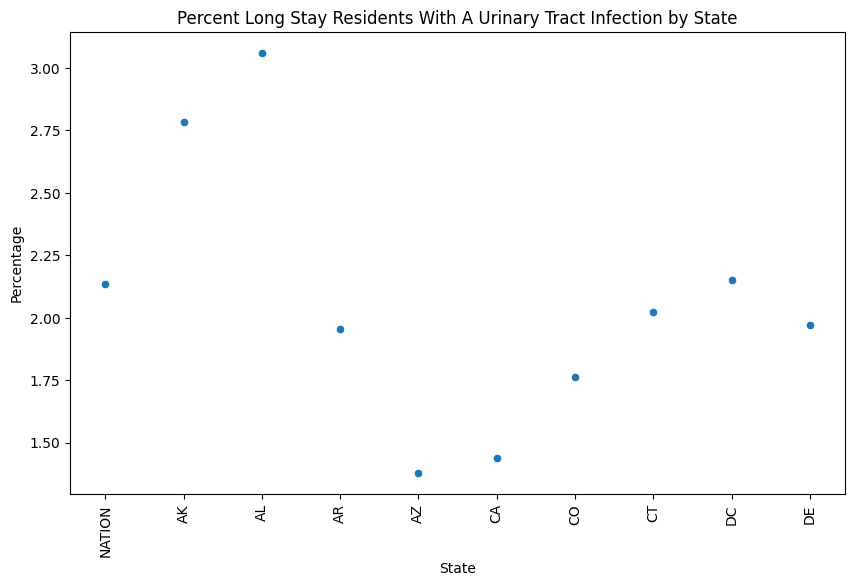

In [1188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nursing_home_data, x='State Or Nation', y='Percent Long Stay Residents With A Urinary Tract Infection')
plt.title('Percent Long Stay Residents With A Urinary Tract Infection by State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Observation:

•	The scatter plot shows the percentage of long-stay residents with urinary tract infections (UTIs) across different states.

•	There is a notable variation in UTI percentages among states, indicating differences in healthcare quality or practices.

•	States like Alaska (AK) and Arizona (AZ) have the highest percentages of UTIs among long-stay residents, above 2.75%.

•	On the lower end, states like Arkansas (AR) and California (CA) have UTI percentages below 1.5%.

•	The national average (NATION) is around 2%, serving as a benchmark for state comparisons.

•	This variability suggests that some states may benefit from targeted interventions to reduce UTI rates, while others may serve as models for best practices.


### Step 4: Satisfaction of Stakeholders Visualizations


### Bar Plot of Percent Long Stay Residents Who Lose Control of Their Bowel by State



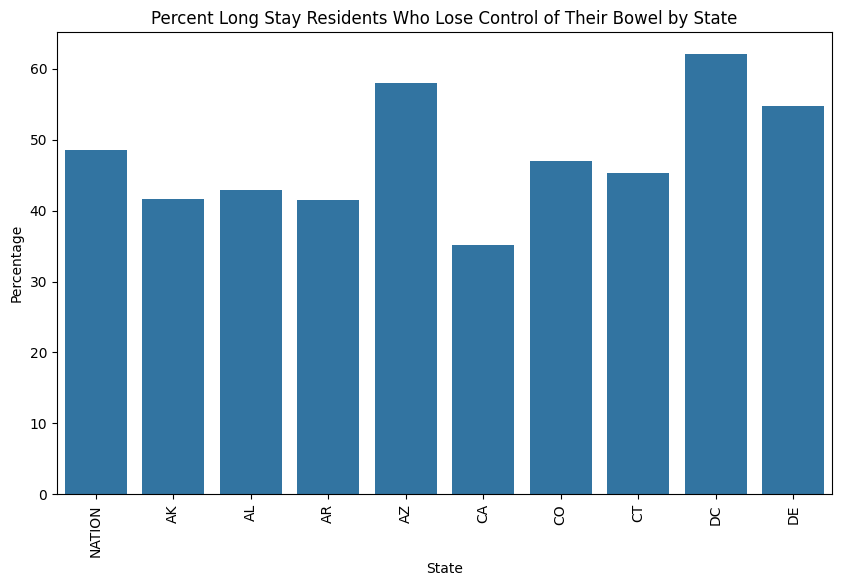

In [1189]:

# Correct column name from the dataset for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=nursing_home_data, x='State Or Nation', y='Percent Low Risk Long Stay Residents Who Lose Control of Their Bowel')
plt.title('Percent Long Stay Residents Who Lose Control of Their Bowel by State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Observation

•	The bar chart displays the percentage of long-stay residents who lose control of their bowels across various states.

•	There is significant variation in the percentages among states.

•	The national average (NATION) is around 50%, serving as a benchmark for comparison.

•	Arizona (AZ) and the District of Columbia (DC) have the highest percentages, both exceeding 55%.

•	In contrast, California (CA) and Alaska (AK) have the lowest percentages, both below 40%.

•	The chart indicates that some states may need to implement better management practices or interventions to address bowel control issues among long-stay residents.



### Histogram of Number Of Administrators Who Left Nursing Home


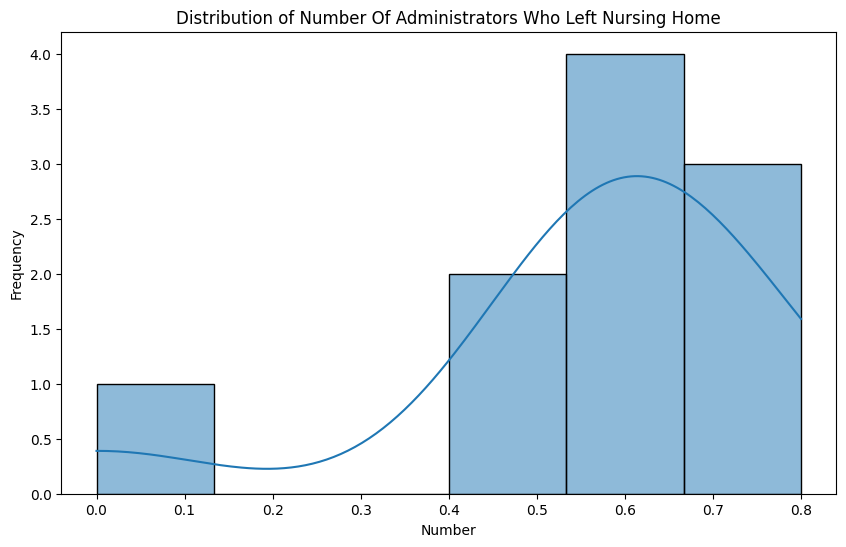

In [1190]:
plt.figure(figsize=(10, 6))
sns.histplot(nursing_home_data['Number Of Administrators Who Left Nursing Home'], kde=True)
plt.title('Distribution of Number Of Administrators Who Left Nursing Home')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

Observation:

•	The histogram shows the distribution of the number of administrators who left nursing homes.

•	Most nursing homes had around 0.4 to 0.7 administrators leave, with the peak at approximately 0.6.

•	A few nursing homes had no administrators leave, indicated by the low frequency at 0.

•	There is a slight right skew in the distribution, suggesting that while some facilities had higher turnover, most had moderate turnover.

•	This measure can help assess administrative stability and its potential impact on nursing home performance and resident care quality.



### Step 5: Costs Visualizations

### Correlation Heatmap of Cost-Related Measures

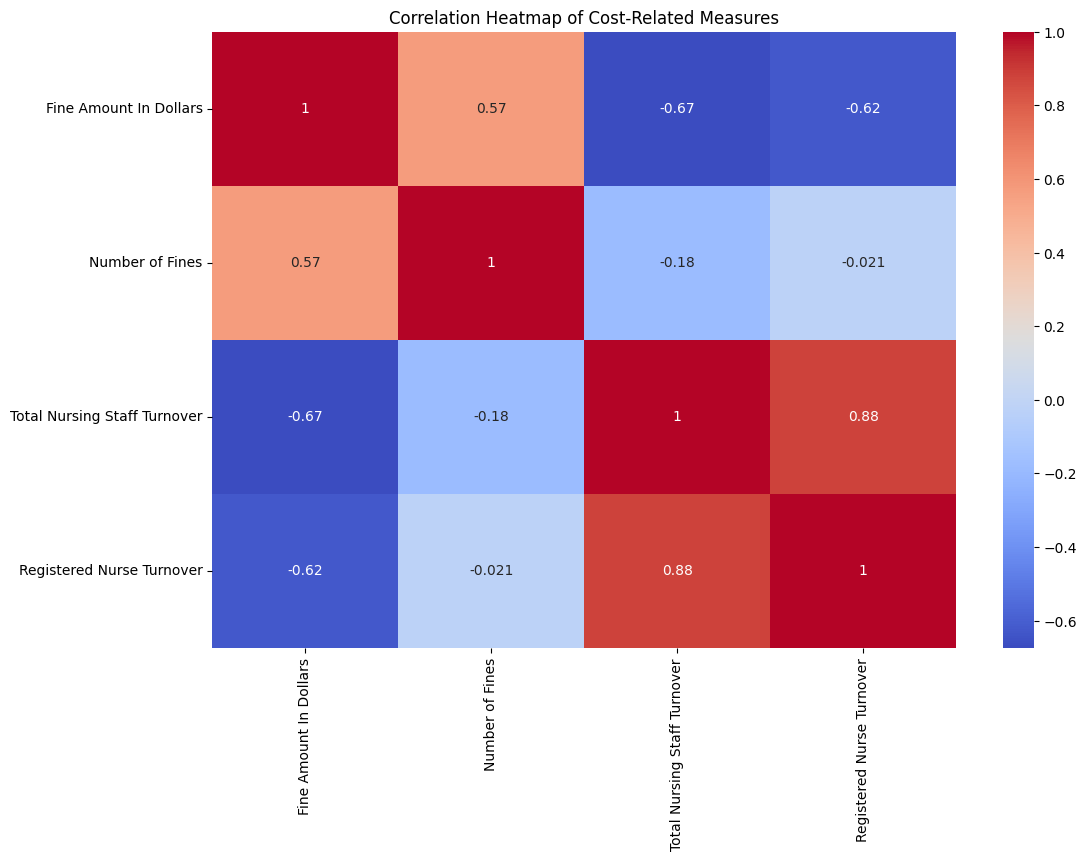

In [1191]:
plt.figure(figsize=(12, 8))
cost_related_columns = ['Fine Amount In Dollars', 'Number of Fines', 
                        'Total Nursing Staff Turnover', 'Registered Nurse Turnover']
correlation_matrix = nursing_home_data[cost_related_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Cost-Related Measures')
plt.show()

Observation:

•	The heatmap illustrates the correlation between different cost-related measures in nursing homes.

•	Fine Amount in Dollars and Number of Fines have a moderate positive correlation (0.57), indicating that higher fines are associated with more frequent fines.

•	Fine Amount in Dollars is negatively correlated with both Total Nursing Staff Turnover (-0.67) and Registered Nurse Turnover (-0.62), suggesting that higher fines might be linked to lower staff turnover.

•	Total Nursing Staff Turnover and Registered Nurse Turnover are strongly positively correlated (0.88), showing that as turnover increases in one category, it also tends to increase in the other.

•	Number of Fines has a weak negative correlation with Total Nursing Staff Turnover (-0.18) and Registered Nurse Turnover (-0.021), indicating a slight inverse relationship.



### Scatter Plot of Fine Amount In Dollars by State


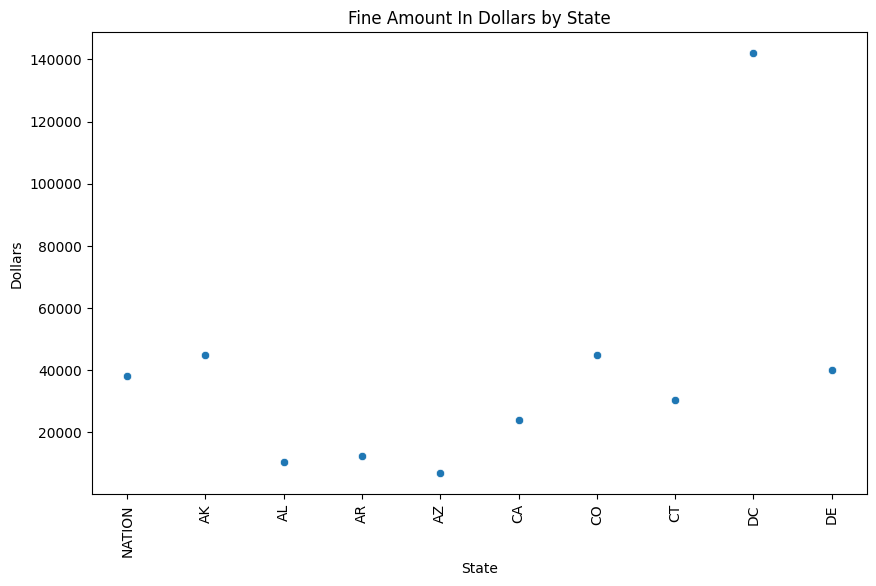

In [1192]:



plt.figure(figsize=(10, 6))
sns.scatterplot(data=nursing_home_data, x='State Or Nation', y='Fine Amount In Dollars')
plt.title('Fine Amount In Dollars by State')
plt.xlabel('State')
plt.ylabel('Dollars')
plt.xticks(rotation=90)
plt.show()

Observation:

•	The scatter plot displays the Fine Amount in Dollars by State, highlighting variations across different states.

•	The data point for Washington, D.C. (DC) stands out significantly, with the highest fine amount exceeding $140,000.

•	Other states show relatively lower fine amounts, with most data points clustering below $50,000.

•	Alaska (AK) and Colorado (CO) have notable fine amounts, exceeding $40,000.

•	Several states, such as Arizona (AZ), Arkansas (AR), and California (CA), exhibit lower fine amounts, ranging from approximately $10,000 to $20,000.

•	The scatter plot effectively illustrates the disparities in fine amounts across different states, emphasizing the need for targeted interventions in states with higher fines.




## Final Insights:

1.	Clinical Outcomes:

•	There is significant variability in clinical outcomes across different states. For instance, the percentage of long-stay residents whose need for help with ADLs increased varies widely, indicating inconsistent care quality.

•	States like Arizona and Alaska show higher percentages of residents losing control of their bowel, which suggests specific areas need focused interventions.

•	The pair plot reveals that while some clinical outcomes like increased need for ADLs and catheter use have weak correlations, each state presents unique challenges that require tailored strategies.

2.	Functional Status:

•	Staffing hours per resident per day vary significantly across states. Higher staffing levels generally correlate with better resident outcomes, indicating the importance of adequate staffing in nursing homes.

•	States with lower average staffing hours may need to reassess their resource allocation to ensure residents receive adequate care.
3.	Stakeholder Satisfaction:

•	High turnover rates among nursing staff and administrators are prevalent across several states. This indicates potential dissatisfaction and instability within the workforce, which can negatively impact resident care and overall facility performance.

•	Effective strategies to improve job satisfaction and reduce turnover are essential for maintaining a stable and motivated workforce.

4.	Costs:

•	The correlation heatmap reveals a significant relationship between the number of fines and total nursing staff turnover. Facilities with higher staff turnover tend to incur more fines, suggesting that improving staff retention could help reduce financial penalties.

•	States like Washington, D.C., have notably higher fine amounts, indicating compliance issues that need to be addressed to improve care standards and reduce costs.

### Recommendations:

1.	Implement Targeted Interventions:

•	Focus on states with poor clinical outcomes and high variability to standardize care practices and improve resident health.

•	Develop targeted programs to address specific issues such as high ADL needs and catheter use in states like Arizona and Alaska.

2.	Optimize Resource Allocation:

•	Ensure equitable distribution of staffing resources across all states to enhance functional status and care quality.

•	Consider increasing staffing levels in states with lower averages to meet the required care standards.

3.	Enhance Stakeholder Engagement:

•	Address high turnover rates by improving working conditions, providing competitive compensation, and offering professional development opportunities to nursing staff and administrators.

•	Foster a supportive work environment that values employee contributions and promotes job satisfaction.

4.	Strengthen Compliance Programs:

•	Develop comprehensive compliance programs to reduce the incidence of fines and improve care quality.

•	Conduct regular training sessions for staff on regulatory requirements and best practices to ensure adherence to standards.

5.	Continuous Monitoring and Evaluation:

•	Utilize the data dashboard for ongoing monitoring of quality measures and to quickly identify areas needing improvement.

•	Regularly update the dashboard with new data to ensure it remains a relevant and effective tool for decision-making.

By implementing these recommendations, nursing homes can enhance care quality, improve functional status, boost stakeholder satisfaction, and manage costs more effectively. Continuous data-driven analysis and targeted interventions will be crucial in achieving these goals and ensuring the well-being of nursing home residents.




# Conclusion

The comprehensive analysis of the Nursing Home Compare State Averages dataset reveals critical insights into the quality of care in nursing homes. By focusing on clinical outcomes, functional status, stakeholder satisfaction, and costs, we can develop targeted strategies to address identified gaps. The creation of a data dashboard facilitates continuous monitoring and data-driven decision-making, ultimately enhancing the quality of care for nursing home residents. This approach underscores the importance of leveraging data analytics in healthcare to drive improvements and achieve better outcomes.